# Gathering Data 


In [161]:
# import important python modules
import pandas as pd 
import numpy as np
from scipy import stats, optimize, interpolate

In [162]:
# gathering data from files

twitter_archive_orig = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions_orig = pd.read_csv('image-predictions.tsv',sep='\t')
tweet_jso_orig=pd.read_json('tweet_json_copy.json',lines=True)

In [163]:
# Take a copy from the original data frames 
twitter_archive=twitter_archive_orig.copy()
image_predictions=image_predictions_orig.copy()
tweet_jso=tweet_jso_orig.copy()

# Assess twitter_archive

In [164]:
# exporing twitter_archive data 
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [165]:
#  take a priefe a bout data meaning and it's details 
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [166]:
# look for the columns info and not-null count values to see what is important to keep it 
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [167]:

floofer=twitter_archive.floofer.value_counts()
floofer

None       2346
floofer      10
Name: floofer, dtype: int64

In [168]:
doggo=twitter_archive.doggo.value_counts()
doggo

None     2259
doggo      97
Name: doggo, dtype: int64

In [169]:

pupper=twitter_archive.pupper.value_counts()
pupper

None      2099
pupper     257
Name: pupper, dtype: int64

In [170]:

puppo=twitter_archive.puppo.value_counts()
puppo

None     2326
puppo      30
Name: puppo, dtype: int64

In [171]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [172]:

twitter_archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [173]:
# exploring important columns to see it's unique values and formating 
# twitter_archive['source'].head(10)
# twitter_archive['timestamp'].head(10)
# twitter_archive['expanded_urls'].head(10)
# twitter_archive['rating_numerator'].head(10)
# twitter_archive['rating_denominator'].head(10)
# twitter_archive['name'].head(10)
# twitter_archive['doggo'].head(10)
# twitter_archive['doggo'].unique()
# twitter_archive['floofer'].head(10)
# twitter_archive['floofer'].unique()
# twitter_archive['puppo'].head(10)
# twitter_archive['puppo'].unique()
# twitter_archive['pupper'].head(10)
# twitter_archive['pupper'].unique()

# Assess image_predictions

In [174]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [175]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [176]:
image_predictions.loc[image_predictions['p1'].str[0].str.isupper()]['p1'].unique()

array(['Welsh_springer_spaniel', 'German_shepherd', 'Rhodesian_ridgeback',
       'Bernese_mountain_dog', 'Gordon_setter', 'Walker_hound', 'Lhasa',
       'English_setter', 'Italian_greyhound', 'Maltese_dog', 'Chihuahua',
       'Blenheim_spaniel', 'Pembroke', 'Chesapeake_Bay_retriever',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'Airedale',
       'West_Highland_white_terrier', 'Rottweiler', 'Siberian_husky',
       'Saint_Bernard', 'Tibetan_terrier', 'Yorkshire_terrier',
       'Pomeranian', 'Norwegian_elkhound', 'Angora', 'Arctic_fox',
       'Staffordshire_bullterrier', 'Lakeland_terrier',
       'American_Staffordshire_terrier', 'Shih-Tzu', 'French_bulldog',
       'Pekinese', 'Brittany_spaniel', 'Arabian_camel',
       'Brabancon_griffon', 'Eskimo_dog', 'Christmas_stocking',
       'German_short-haired_pointer', 'Shetland_sheepdog',
       'Irish_terrier', 'English_springer', 'Sussex_spaniel',
       'Dandie_Dinmont', 'Norwich_terrier', 'Norfolk_terrier',
     

In [177]:
# image_predictions.loc[image_predictions['p1'].str[0].str.islower()][].unique()

# Assess tweet_jso

In [178]:
tweet_jso.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [179]:
tweet_jso.id_str.count()

2354

In [180]:
tweet_jso.truncated.unique()

array([False])

In [181]:
tweet_jso.full_text.head()

0                                                         This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                     This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                               This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: full_text, dtype: object

In [182]:
tweet_jso.entities
tweet_jso.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [183]:
tweet_jso.extended_entities
tweet_jso.extended_entities[0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [184]:
tweet_jso.source

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2349    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2350    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2351    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [185]:
tweet_jso.user

0       {'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...
1       {'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...
2       {'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...
3       {'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...
4       {'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': 

In [186]:
tweet_jso.geo

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2349   NaN
2350   NaN
2351   NaN
2352   NaN
2353   NaN
Name: geo, Length: 2354, dtype: float64

In [187]:
tweet_jso.coordinates

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2349   NaN
2350   NaN
2351   NaN
2352   NaN
2353   NaN
Name: coordinates, Length: 2354, dtype: float64

In [188]:
tweet_jso.is_quote_status

0       False
1       False
2       False
3       False
4       False
        ...  
2349    False
2350    False
2351    False
2352    False
2353    False
Name: is_quote_status, Length: 2354, dtype: bool

In [189]:
tweet_jso.place

0       None
1       None
2       None
3       None
4       None
        ... 
2349    None
2350    None
2351    None
2352    None
2353    None
Name: place, Length: 2354, dtype: object

In [190]:
tweet_jso.contributors

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2349   NaN
2350   NaN
2351   NaN
2352   NaN
2353   NaN
Name: contributors, Length: 2354, dtype: float64

In [191]:
tweet_jso.is_quote_status

0       False
1       False
2       False
3       False
4       False
        ...  
2349    False
2350    False
2351    False
2352    False
2353    False
Name: is_quote_status, Length: 2354, dtype: bool

In [192]:
tweet_jso.retweet_count

0       8853
1       6514
2       4328
3       8964
4       9774
        ... 
2349      41
2350     147
2351      47
2352      48
2353     532
Name: retweet_count, Length: 2354, dtype: int64

In [193]:
tweet_jso.favorite_count

0       39467
1       33819
2       25461
3       42908
4       41048
        ...  
2349      111
2350      311
2351      128
2352      132
2353     2535
Name: favorite_count, Length: 2354, dtype: int64

In [194]:
tweet_jso.favorited

0       False
1       False
2       False
3       False
4       False
        ...  
2349    False
2350    False
2351    False
2352    False
2353    False
Name: favorited, Length: 2354, dtype: bool

In [195]:
tweet_jso.possibly_sensitive

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2349    0.0
2350    0.0
2351    0.0
2352    0.0
2353    0.0
Name: possibly_sensitive, Length: 2354, dtype: float64

In [196]:
tweet_jso.retweeted
tweet_jso.retweeted.unique()

array([False])

In [197]:
tweet_jso.possibly_sensitive_appealable

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2349    0.0
2350    0.0
2351    0.0
2352    0.0
2353    0.0
Name: possibly_sensitive_appealable, Length: 2354, dtype: float64

In [198]:
tweet_jso.lang

0       en
1       en
2       en
3       en
4       en
        ..
2349    en
2350    en
2351    en
2352    en
2353    en
Name: lang, Length: 2354, dtype: object

In [199]:
tweet_jso.retweeted_status
tweet_jso.loc[tweet_jso.retweeted_status.notnull()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
31,2017-07-15 02:45:48+00:00,886054160059072513,886054160059072512,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21, 26]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Athletics', 'name': 'Oakland A's 🌳🐘⚾️', 'id': 19607400, 'id_str': '19607400', 'indices': [3,...",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",NaN,NaN,None,NaN,True,108,0,False,False,0.0,0.0,und,"{'created_at': 'Sat Jul 15 02:44:07 +0000 2017', 'id': 886053734421102592, 'id_str': '886053734421102592', 'full_text': '12/10 #BATP https://t.co/WxwJmvjfxo', 'truncated': False, 'display_text_ran...",8.860534e+17,8.860534e+17,NaN
35,2017-07-13 01:35:06+00:00,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs™ (author)', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': [], 'media': ...","{'media': [{'id': 830583314243268608, 'id_str': '830583314243268608', 'indices': [110, 133], 'media_url': 'http://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg', 'media_url_https': 'https://pbs.twimg.co...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",NaN,NaN,None,NaN,False,19297,0,False,False,0.0,0.0,en,"{'created_at': 'Sun Feb 12 01:04:29 +0000 2017', 'id': 830583320585068544, 'id_str': '830583320585068544', 'full_text': 'This is Lilly. She just parallel barked. Kindly requests a reward now. 13/1...",NaN,NaN,NaN
67,2017-06-26 00:13:58+00:00,879130579576475649,879130579576475648,RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs™ (author)', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': []}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",NaN,NaN,None,NaN,False,7181,0,False,False,NaN,NaN,en,"{'created_at': 'Fri Jun 23 01:10:23 +0000 2017', 'id': 878057613040115712, 'id_str': '878057613040115712', 'full_text': 'This is Emmy. She was adopted today. Massive round of pupplause for Emmy an...",NaN,NaN,NaN
72,2017-06-24 00:09:53+00:00,878404777348136964,878404777348136960,"RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs™ (author)', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': []}",NaN,"<a 

In [200]:
tweet_jso.quoted_status

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2349    NaN
2350    NaN
2351    NaN
2352    NaN
2353    NaN
Name: quoted_status, Length: 2354, dtype: object

In [201]:
tweet_jso.display_text_range

0        [0, 85]
1       [0, 138]
2       [0, 121]
3        [0, 79]
4       [0, 138]
          ...   
2349    [0, 120]
2350    [0, 137]
2351    [0, 130]
2352    [0, 139]
2353    [0, 131]
Name: display_text_range, Length: 2354, dtype: object

#  Cleansing Process (quality and Tidy )

# quality issue 1 : get the Source and  Remove the "a" tags

In [202]:

def source_slice(source):
     return source.split('">')[1][:-4]
twitter_archive.source=twitter_archive.source.apply(source_slice) 


# quality issue 2 :
since ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id','expanded_urls']
will not used we can drop the none null values then drop the columns 

In [203]:
# Drop the not null values in the columne mentioned above
twitter_archive.drop(twitter_archive[twitter_archive.retweeted_status_id.notnull()].index,inplace=True)
twitter_archive.drop(twitter_archive[twitter_archive.retweeted_status_user_id.notnull()].index,inplace=True)
twitter_archive.drop(twitter_archive[twitter_archive.retweeted_status_timestamp.notnull()].index,inplace=True)
twitter_archive.drop(twitter_archive[twitter_archive.in_reply_to_status_id.notnull()].index,inplace=True)
twitter_archive.drop(twitter_archive[twitter_archive.in_reply_to_user_id.notnull()].index,inplace=True)

In [204]:
# Drop the columne
twitter_archive.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id','expanded_urls'],axis=1,inplace=True)


# quality issue 3 : 
convert timestamp to timestamp instead of object

In [205]:
 twitter_archive['timestamp']=pd.to_datetime(twitter_archive['timestamp'])
twitter_archive['timestamp'].head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

# quality issue :4
rating_numerator can't be bigger than rating_denominator so i assigned all the rating_numerator bigger than the rating_denominator to 10 

In [206]:
# assign the rating_numerator wich is bigger than rating_denominator to be 10
twitter_archive.loc[(twitter_archive['rating_numerator'] > 10 )==True,'rating_numerator']=10

In [207]:
twitter_archive.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,10,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10,10,Tilly,None,None,None,None


# quality issue :5
# Drop un-used columns 

In [208]:
# Drop un unsed columns 
image_predictions.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','img_num','jpg_url','p1_conf','p1_dog'],axis =1,inplace=True)

# quality issue : 6
filtring the dog names , as the names must start with capital letters 

In [209]:
# get all the names with capital letters
twitter_archive.loc[twitter_archive['name'].str[0].str.isupper()]['name'].unique()   

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [210]:
# get all the names with lower letters
drbd_names=twitter_archive.loc[twitter_archive['name'].str[0].str.islower()]['name'].unique()
drbd_names

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [211]:
# drop all the names with ower letter in the beginning , beacuse it seems to be inconsequential 
twitter_archive.loc[twitter_archive['name'].isin(drbd_names)==True,'name']="None"

# qulaity issue :7

In [212]:
# drop not used columns 
tweet_jso.drop(['id_str','truncated','entities','extended_entities','in_reply_to_status_id','user','geo','coordinates','place','contributors','is_quote_status','favorite_count','favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable','retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status'],axis=1,inplace=True)
tweet_jso.drop(['in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','created_at'],axis=1,inplace=True)
tweet_jso.drop(['display_text_range','full_text','source'],axis=1,inplace=True)

In [213]:
tweet_jso

,id,retweet_count,lang
0,892420643555336193,8853,en
1,892177421306343426,6514,en
2,891815181378084864,4328,en
3,891689557279858688,8964,en
4,891327558926688256,9774,en
...,...,...,...
2349,666049248165822465,41,en
2350,666044226329800704,147,en
2351,666033412701032449,47,en
2352,666029285002620928,48,en


# qulaity issue :8
drop all values that is not belomg to Dog names in p1 column image_predictions

In [214]:
image_predictions.loc[image_predictions['p1'].str[0].str.isupper()]['p1'].unique()

array(['Welsh_springer_spaniel', 'German_shepherd', 'Rhodesian_ridgeback',
       'Bernese_mountain_dog', 'Gordon_setter', 'Walker_hound', 'Lhasa',
       'English_setter', 'Italian_greyhound', 'Maltese_dog', 'Chihuahua',
       'Blenheim_spaniel', 'Pembroke', 'Chesapeake_Bay_retriever',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'Airedale',
       'West_Highland_white_terrier', 'Rottweiler', 'Siberian_husky',
       'Saint_Bernard', 'Tibetan_terrier', 'Yorkshire_terrier',
       'Pomeranian', 'Norwegian_elkhound', 'Angora', 'Arctic_fox',
       'Staffordshire_bullterrier', 'Lakeland_terrier',
       'American_Staffordshire_terrier', 'Shih-Tzu', 'French_bulldog',
       'Pekinese', 'Brittany_spaniel', 'Arabian_camel',
       'Brabancon_griffon', 'Eskimo_dog', 'Christmas_stocking',
       'German_short-haired_pointer', 'Shetland_sheepdog',
       'Irish_terrier', 'English_springer', 'Sussex_spaniel',
       'Dandie_Dinmont', 'Norwich_terrier', 'Norfolk_terrier',
     

In [215]:
drbd_p1=image_predictions.loc[image_predictions['p1'].str[0].str.islower()]['p1'].unique()
drbd_p1

array(['redbone', 'miniature_pinscher', 'box_turtle', 'chow',
       'shopping_cart', 'miniature_poodle', 'golden_retriever', 'pug',
       'bloodhound', 'hen', 'desktop_computer', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'black-and-tan_coonhound', 'coho', 'toy_terrier', 'llama',
       'curly-coated_retriever', 'dalmatian', 'seat_belt', 'snail',
       'miniature_schnauzer', 'triceratops', 'swab', 'hay', 'hyena',
       'jigsaw_puzzle', 'toy_poodle', 'giant_schnauzer', 'vizsla',
       'vacuum', 'teddy', 'papillon', 'porcupine', 'goose', 'borzoi',
       'beagle', 'hare', 'electric_fan', 'web_site', 'ibex', 'kuvasz',
       'fire_engine', 'lorikeet', 'flat-coated_retriever', 'toyshop',
       'common_iguana', 'frilled_lizard', 'leatherback_turtle', 'hamster',
       'trombone', 'canoe', 'king_penguin', 'shopping_basket',
       'standard_poodle', 'basenji', 'bearskin', 'bustard',
       'crash_helmet', 'komondor', 'ski_mask', 'ma

In [216]:
# drop all the names with lower letter in the beginning , beacuse it seems to be inconsequential 
image_predictions.loc[image_predictions['p1'].isin(drbd_p1)==True,'p1']="None"

In [217]:
# 
twitter_archive.loc[(twitter_archive['doggo']=='None') & (twitter_archive['pupper']=='None') & (twitter_archive['floofer'] =='None') & (twitter_archive['puppo'] =='None')] 

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,10,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,10,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,10,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",10,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,None,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,None,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,None,None,None,None,None


# titdy issue :1
compinning the 4 columns puppo,pupper,floofer,doggo in one column 

In [218]:
# convert the null values with to empty string ""
twitter_archive.loc[twitter_archive['doggo']=='None','doggo']=""
twitter_archive.loc[twitter_archive['pupper']=='None','pupper']=""
twitter_archive.loc[twitter_archive['floofer'] =='None','floofer']=""
twitter_archive.loc[twitter_archive['puppo'] =='None','puppo']=""
# compin the 4 columns (puppo,pupper,floofer,doggo) in 1 column 
twitter_archive['stage'] = twitter_archive.doggo + twitter_archive.floofer + twitter_archive.pupper + twitter_archive.puppo

In [219]:
# get the unique values for the new column stage
twitter_archive['stage'].unique()


array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [220]:
# get the cases with "doggopuppo" value
twitter_archive.loc[twitter_archive['stage'].isin(['doggofloofer', 'doggopupper','doggopuppo'])]
twitter_archive.loc[twitter_archive.stage=="doggofloofer","stage"]="doggo/floofer"
twitter_archive.loc[twitter_archive.stage=="doggopupper","stage"]="doggo/pupper"
twitter_archive.loc[twitter_archive.stage=="doggopuppo","stage"]="doggo/puppo"




In [221]:
twitter_archive['stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo/puppo',
       'doggo/floofer', 'doggo/pupper'], dtype=object)

In [222]:
pd.set_option('display.max_colwidth', 200)
twitter_archive.loc[twitter_archive['stage'].isin(['doggo/puppo', 'doggo/pupper','doggo/floofer'])]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
191,855851453814013952,2017-04-22 18:31:02+00:00,Twitter for iPhone,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,10,10,None,doggo,,,puppo,doggo/puppo
200,854010172552949760,2017-04-17 16:34:26+00:00,Twitter for iPhone,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",10,10,None,doggo,floofer,,,doggo/floofer
460,817777686764523521,2017-01-07 16:59:28+00:00,Twitter for iPhone,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",10,10,Dido,doggo,,pupper,,doggo/pupper
531,808106460588765185,2016-12-12 00:29:28+00:00,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,10,10,None,doggo,,pupper,,doggo/pupper
575,801115127852503040,2016-11-22 17:28:25+00:00,Twitter for iPhone,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,10,10,Bones,doggo,,pupper,,doggo/pupper
705,785639753186217984,2016-10-11 00:34:48+00:00,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,10,10,Pinot,doggo,,pupper,,doggo/pupper
733,781308096455073793,2016-09-29 01:42:20+00:00,Vine - Make a Scene,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",10,10,None,doggo,,pupper,,doggo/pupper
889,759793422261743616,2016-07-31 16:50:42+00:00,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",10,10,Maggie,doggo,,pupper,,doggo/pupper
956,751583847268179968,2016-07-09 01:08:47+00:00,Twitter for iPhone,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5,10,None,doggo,,pupper,,doggo/pupper
1063,741067306818797568,2016-06-10 00:39:48+00:00,Twitter for iPhone,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,10,10,None,doggo,,pupper,,doggo/pupper


In [223]:
twitter_archive['stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo/puppo',
       'doggo/floofer', 'doggo/pupper'], dtype=object)

In [224]:
# Drop columns "doggo","pupper","floofer","puppo"
twitter_archive.drop(["doggo","pupper","floofer","puppo"],axis=1,inplace=True)

In [225]:
twitter_archive.stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo/puppo',
       'doggo/floofer', 'doggo/pupper'], dtype=object)

# titdy issue :2

In [226]:
# check the p1 values if it all 
image_predictions['p1']=image_predictions['p1'].str.lower()

# titdy issue :3

In [227]:

# Rename "id" to "tweet_id"
tweet_jso.rename(columns={'id':'tweet_id'},inplace=True)

# titdy issue :4
compinning all the data frams in 1 

In [228]:
twitter_archive_master=pd.merge(tweet_jso,image_predictions,on='tweet_id')

In [229]:
twitter_archive_master=pd.merge(twitter_archive_master,twitter_archive,on='tweet_id')

In [230]:
twitter_archive_master.head(2)

,tweet_id,retweet_count,lang,p1,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,8853,en,none,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,10,10,Phineas,
1,892177421306343426,6514,en,chihuahua,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10,10,Tilly,


In [231]:
twitter_archive_master[twitter_archive_master['name'].str[0].str.islower()]['name'].unique()

array([], dtype=object)

In [232]:
twitter_archive_master.stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo/puppo',
       'doggo/floofer', 'doggo/pupper'], dtype=object)

In [233]:
twitter_archive_master

,tweet_id,retweet_count,lang,p1,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,8853,en,none,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,10,10,Phineas,
1,892177421306343426,6514,en,chihuahua,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10,10,Tilly,
2,891815181378084864,4328,en,chihuahua,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,10,10,Archie,
3,891689557279858688,8964,en,none,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,10,10,Darla,
4,891327558926688256,9774,en,none,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",10,10,Franklin,
...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,41,en,none,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,None,
1967,666044226329800704,147,en,rhodesian_ridgeback,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,None,
1968,666033412701032449,47,en,german_shepherd,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,None,
1969,666029285002620928,48,en,none,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,None,


In [234]:
twitter_archive_master['timestamp'] = twitter_archive_master['timestamp'].apply(lambda a: pd.to_datetime(a).date()) 

# ------------ Visualization

In [235]:
# assing only the first 10 dog types
Dog_type=twitter_archive_master.p1.value_counts()[1:10]
Dog_type

labrador_retriever          94
pembroke                    88
chihuahua                   78
samoyed                     40
pomeranian                  38
french_bulldog              26
chesapeake_bay_retriever    23
german_shepherd             20
siberian_husky              20
Name: p1, dtype: int64

<AxesSubplot:ylabel='p1'>

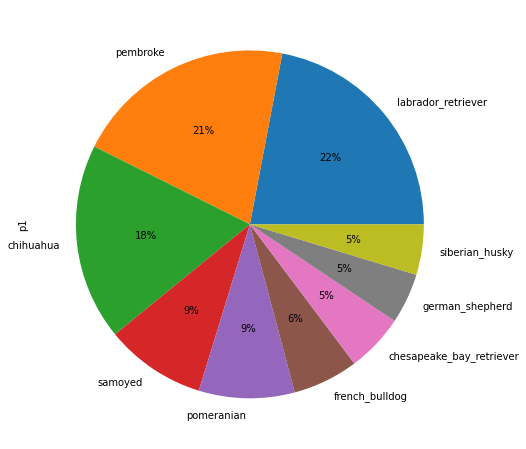

In [236]:
# Top ten 10 dogs types
Dog_type.plot(kind='pie',autopct='%1.0f%%',figsize=(10,8))

<AxesSubplot:xlabel='lang', ylabel='count'>

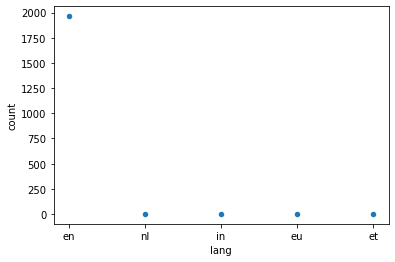

In [237]:
# Look for the most used language
tweets_lang=twitter_archive_master.lang.value_counts()
# most used language
tweets_lang=tweets_lang.to_frame()
tweets_lang.reset_index(inplace=True)
tweets_lang.columns = ['lang','count']
tweets_lang
tweets_lang.plot(kind ='scatter',x='lang',y='count')

<AxesSubplot:ylabel='name'>

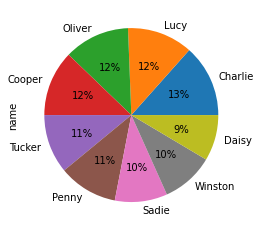

In [238]:
dogs_names=twitter_archive_master.name.value_counts()[0:10]
dogs_names=dogs_names[1:]
# dogs_names
dogs_names.plot(kind='pie',autopct='%1.0f%%')

<AxesSubplot:>

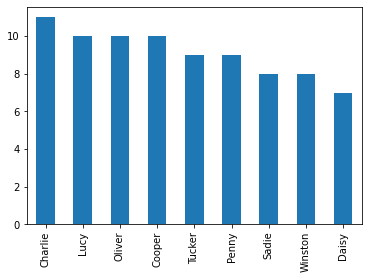

In [239]:
# bar chart that represent the dog names ratio 
dogs_names.plot(kind='bar')

array([<AxesSubplot:ylabel='rating_numerator'>], dtype=object)

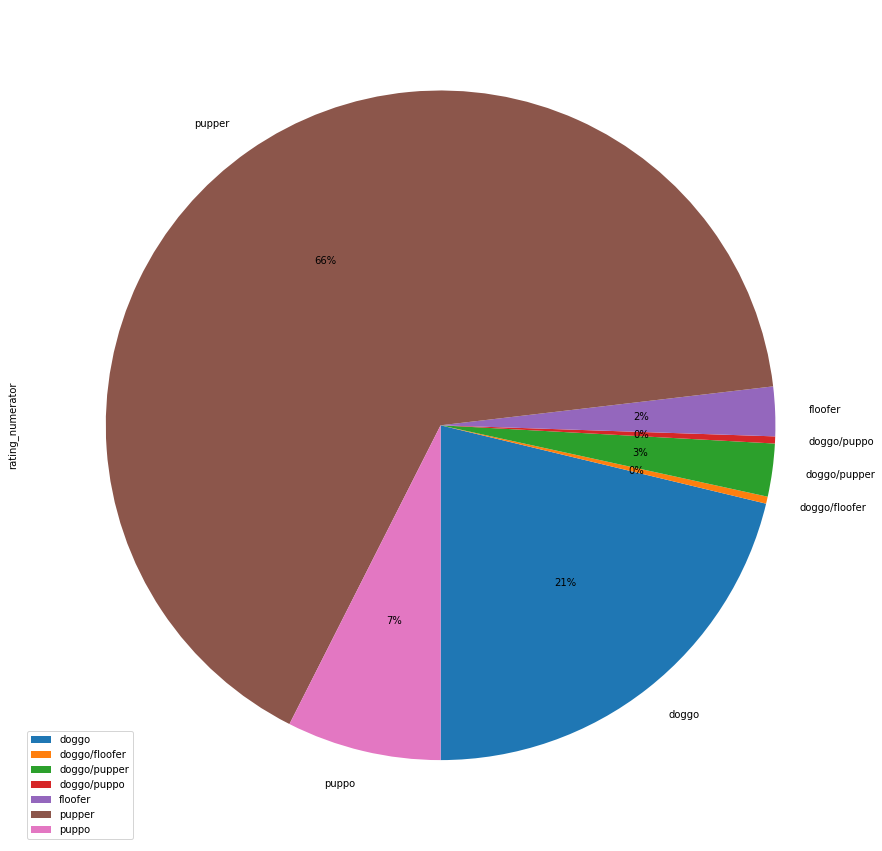

In [240]:
# Look for the most common Dog Type 
# twitter_archive_master.stage.unique()
f=twitter_archive_master.groupby('stage')['rating_numerator'].sum()[1:]
f=pd.DataFrame(f)
f.plot(kind='pie',subplots=True,autopct='%1.0f%%', startangle=270,figsize=(15, 20))

<AxesSubplot:xlabel='rating_numerator', ylabel='retweet_count'>

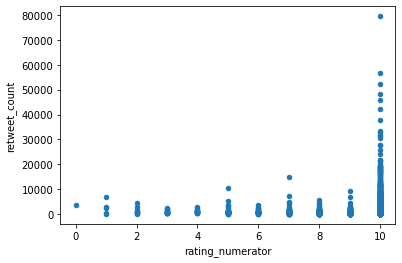

In [241]:
# The relation between the rating and retweet 
twitter_archive_master.plot(x='rating_numerator',y='retweet_count',kind='scatter')

In [242]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [243]:
# modifing columns view settings
pd.set_option('display.max_column',None)